## Graph topology

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

### Connectedness

In [21]:
G=nx.erdos_renyi_graph(50,0.03)

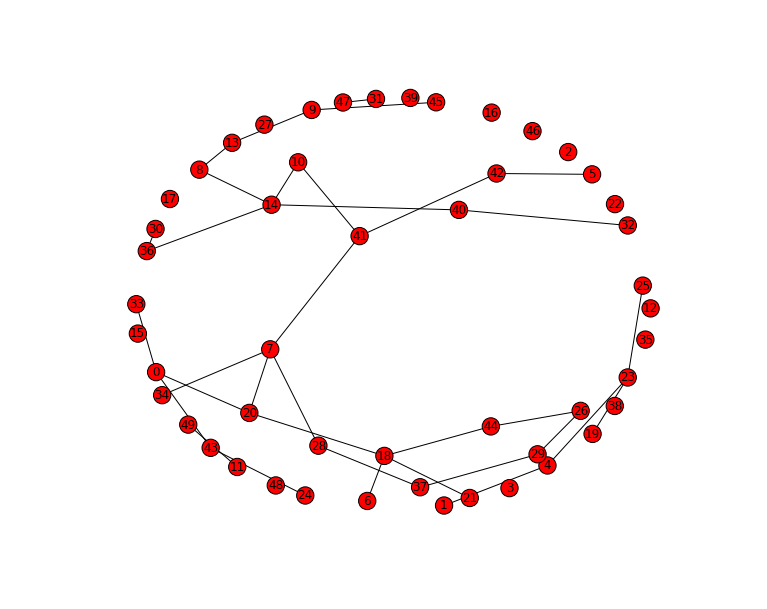

In [22]:
nx.draw(G)

In [23]:
nx.is_connected(G)

False

In [24]:
components=nx.connected_components(G)
print(components)

[[0, 1, 4, 5, 6, 7, 8, 9, 10, 13, 14, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 32, 33, 34, 36, 37, 40, 41, 42, 43, 44, 45], [49, 11], [47, 31], [2], [3], [12], [15], [16], [17], [22], [27], [35], [38], [39], [46], [48]]


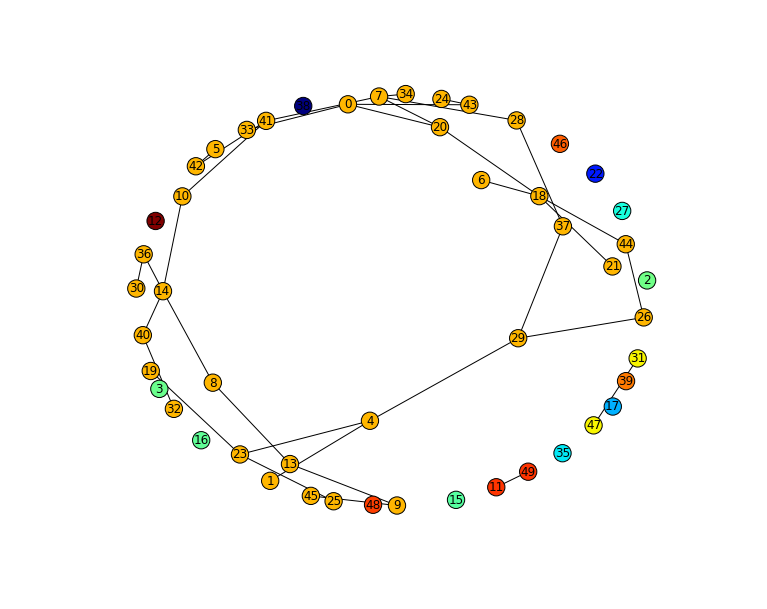

In [25]:
colors=np.random.random(size=len(components))
node_color_dict={}

for idx, nodes in enumerate(components):
    for n in nodes:
        node_color_dict[n]=colors[idx]
    
nx.draw(G, node_color=[node_color_dict[n] for n in G.nodes()], pos=nx.layout.spring_layout(G))

### Degree distribution

In [26]:
huge_graph=nx.read_gpickle("../data/airport/big_airportnet.gpickle")

In [27]:
degs=list(huge_graph.degree().values())

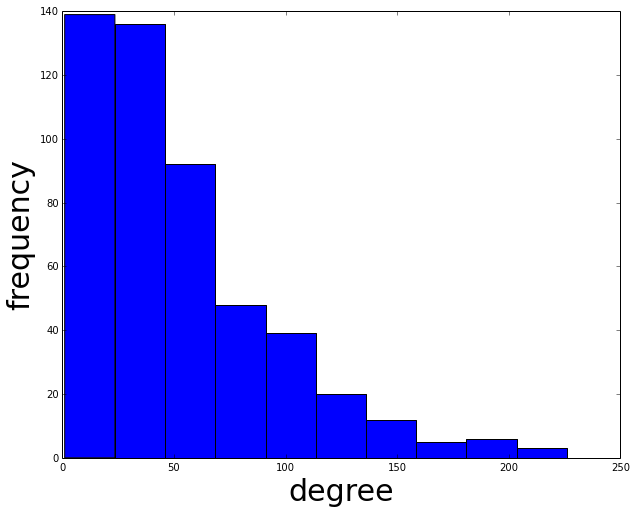

In [28]:
plt.hist(degs)
plt.xlabel("degree", fontsize=30)
plt.ylabel("frequency", fontsize=30)

### Centrality

In [29]:
cents=nx.centrality.betweenness_centrality(huge_graph)

#### Get the centralmost node:

In [30]:
sorted(cents.keys(), key=lambda x:cents[x])[-1]

'FRA'

(array([ 443.,   25.,    8.,    6.,    8.,    1.,    4.,    1.,    1.,    3.]),
 array([ 0.        ,  0.00533981,  0.01067962,  0.01601943,  0.02135924,
        0.02669905,  0.03203886,  0.03737866,  0.04271847,  0.04805828,
        0.05339809]),
 <a list of 10 Patch objects>)

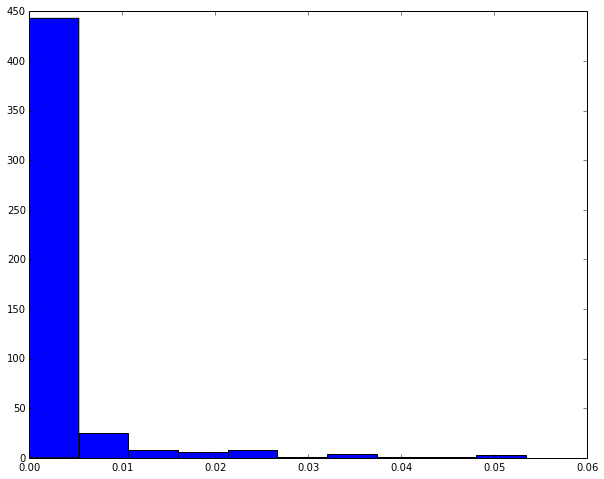

In [31]:
plt.hist(list(cents.values()), bins=10)

Many real world networks tend to have these very few "hubs" with high centrality

### Clustering

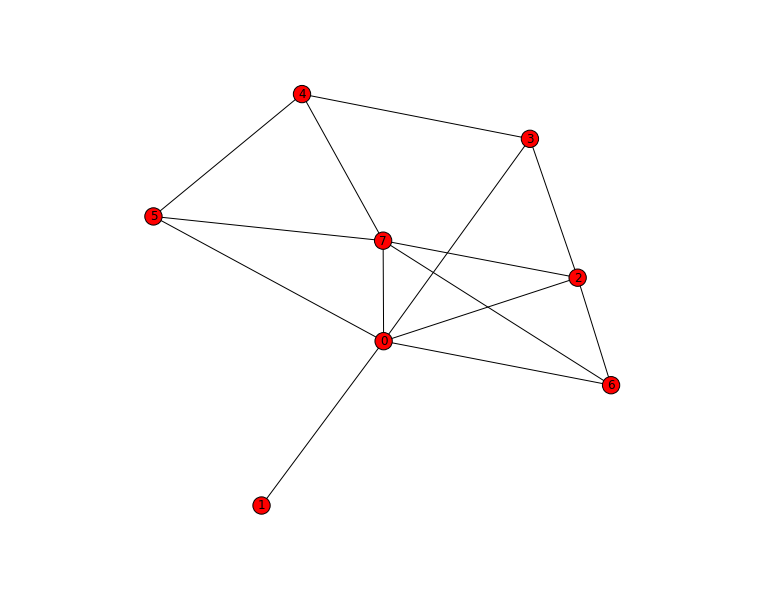

In [32]:
J=nx.erdos_renyi_graph(8,0.4)
nx.draw(J)

In [33]:
nx.clustering(J)

{0: 0.3333333333333333,
 1: 0.0,
 2: 0.6666666666666666,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0.6666666666666666,
 6: 1.0,
 7: 0.5}

In [34]:
nx.write_adjlist(J,"toy_graph.edgelist")

##### Now let's see how our scale free network is regarding clustering:

In [35]:
huge_clust=nx.clustering(huge_graph)

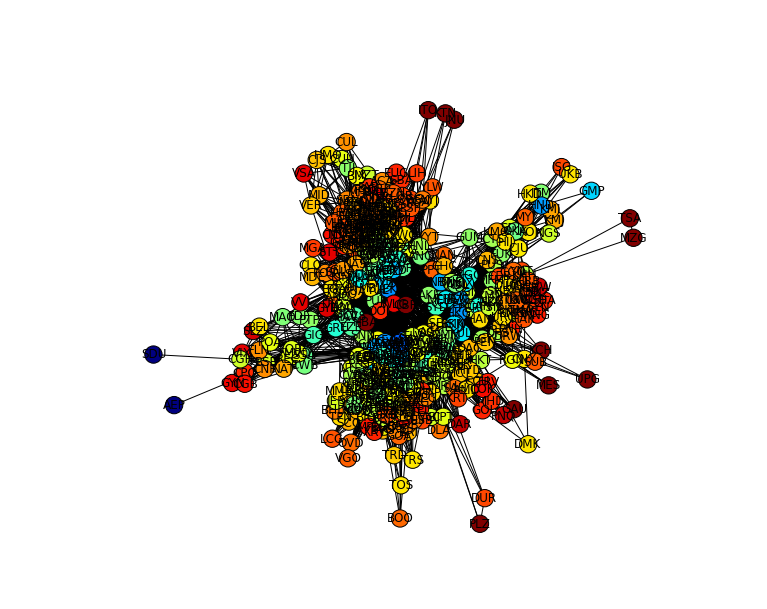

In [36]:
nx.draw(huge_graph, node_color=[huge_clust[n] for n in huge_graph.nodes()], pos=nx.layout.fruchterman_reingold_layout(huge_graph, scale=2.0, iterations=100))

(array([   2.,    0.,   13.,   29.,   50.,   90.,  111.,  100.,   77.,   28.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

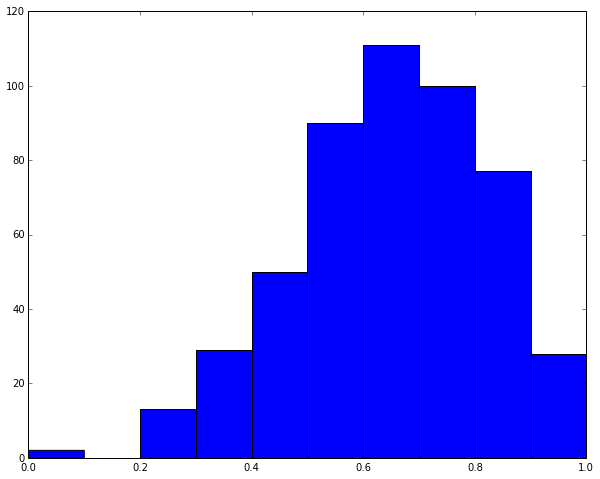

In [37]:
plt.hist(list(huge_clust.values()))

### Average path length

In [38]:
nx.average_shortest_path_length(huge_graph)

2.2686573146292583

#### In many real world networks, shortest pathlengths increase sublinearly with network size:

In [39]:
size_array=range(50,1000,50)
avg_pathlens=[nx.average_shortest_path_length(nx.barabasi_albert_graph(n, 4)) for n in size_array]

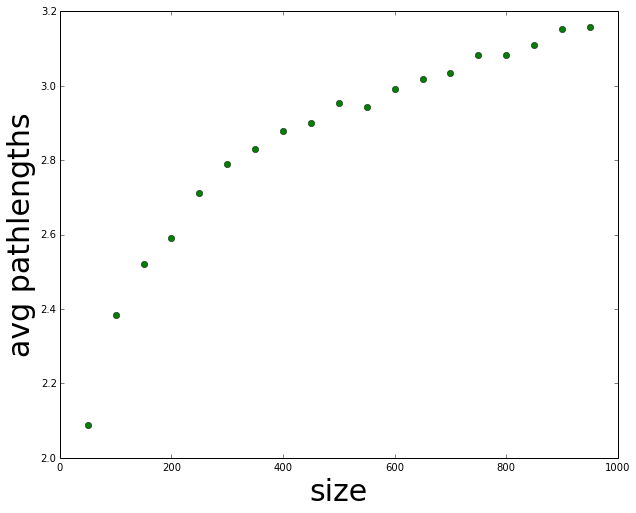

In [40]:
plt.plot(size_array, avg_pathlens, 'go')
plt.xlabel("size", fontsize=30)
plt.ylabel("avg pathlengths", fontsize=30)

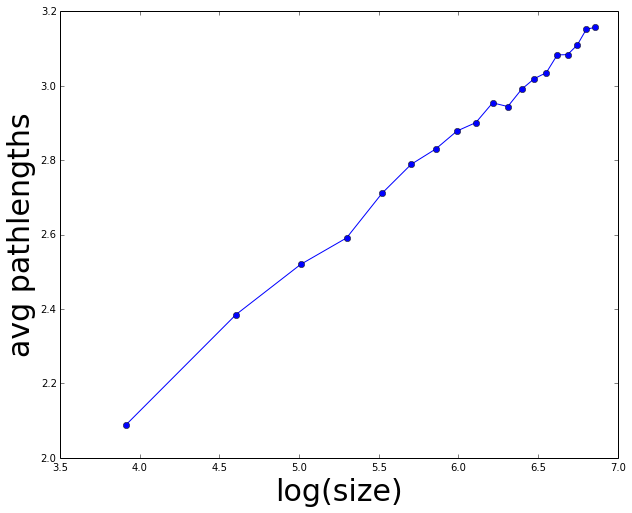

In [41]:
plt.plot(np.log(np.array(size_array)), np.array(avg_pathlens), 'bo-')
plt.xlabel("log(size)", fontsize=30)
plt.ylabel("avg pathlengths", fontsize=30)

### Diameter:

3

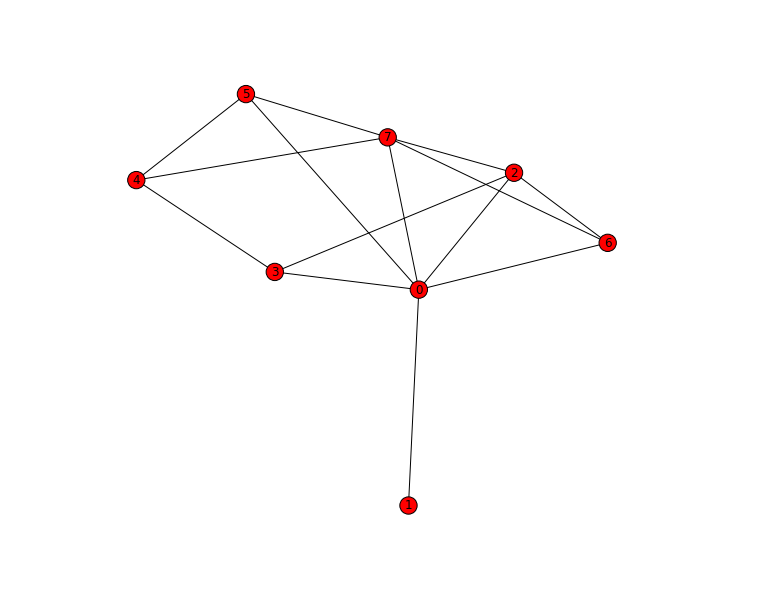

In [42]:
nx.draw(J)
nx.diameter(J)

## Let's do some exercises!